ForGroup : 26194
GroupGal : 83093
Max CoSepBCG 8.912095069885254
Min CoSepBCG 0.0
Cut 0.7397038908004762
GroupGal : 4143
Outer percentage 4.98597956506565
StellarMasses : 114685
EnvMeasures : 67996
visualMorph : 38795


WARNING

Join GroupGal & StellarMasses 2079
GroupGal & StellarMasses
['CATAID', 'RA', 'Dec', 'Z_1', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE_1', 'SigErr', 'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen', 'AngSepIterCen', 'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen', 'Z_2', 'nQ', 'SURVEY_CODE_2', 'SURVEY_CLASS', 'Z_TONRY', 'fluxscale', 'zmax_19p8', 'zmax_19p4', 'zmax_19p0', 'zmax_17p8', 'nbands', 'S2N', 'PPP', 'logmstar', 'dellogmstar', 'logmoverl_i', 'dellogmoverl_i', 'logage', 'dellogage', 'logtau', 'dellogtau', 'logmintsfh', 'dellogmintsfh', 'logmremnants', 'dellogmremnants', 'metal', 'delmetal', 'extBV', 'delextBV', 'logLWage', 'dellogLWage', 'gminusi', 'delgminusi', 'uminusr', 'deluminusr', 'gminusi_stars', 'uminusr_stars', 'C_logM_ur', 'C_logM_gi', 'C_logM_eBV', 'fitphot_u', 'delfitphot_u', 'absmag_u', 'delabsmag_u', 'absmag_u_stars', 'fitphot_g', 'delfitphot_g', 'absmag_g', 'delabsmag_g', 'absmag_g_stars', 'fitphot_r', 'delfitphot_r', 'ab

: MergeConflictWarning: Cannot merge meta key 'TCOMM2' types <class 'str'> and <class 'str'>, choosing TCOMM2='J2000' [astropy.utils.metadata]


Joining Environmental Measures 12
12
 yfield uminusr ymin 1.761544108390808 ymax 2.4315218925476074

 xfield CountInCyl xmin 6.333000183105469 xmax 27.732999801635742
 xfield CountInCyl log values - xmin 1.8473519086837769 xmax 3.322983503341675
Spearman Correlation x: CountInCyl y: uminusr Correlation : -0.06993006993006995 T-Test : 0.8290236405313092
Pearson Correlation x: CountInCyl y: uminusr Correlation : -0.572038351624058 T-Test : 0.051962183002757546
Linear Regresion x: CountInCyl y: uminusr slope : -0.28202768313727156 Intercept 2.969050512934303 Correlation -0.572038351624058 Wald test 0.051962183002757525 0.12787939926498815
 xfield DistanceTo5nn xmin 0.5410000085830688 xmax 0.8659999966621399
 xfield DistanceTo5nn log values - xmin -0.5960204601287842 xmax -0.13238920271396637
Spearman Correlation x: DistanceTo5nn y: uminusr Correlation : 0.14685314685314685 T-Test : 0.6487957097846664
Pearson Correlation x: DistanceTo5nn y: uminusr Correlation : 0.4455332122618687 T-Test :

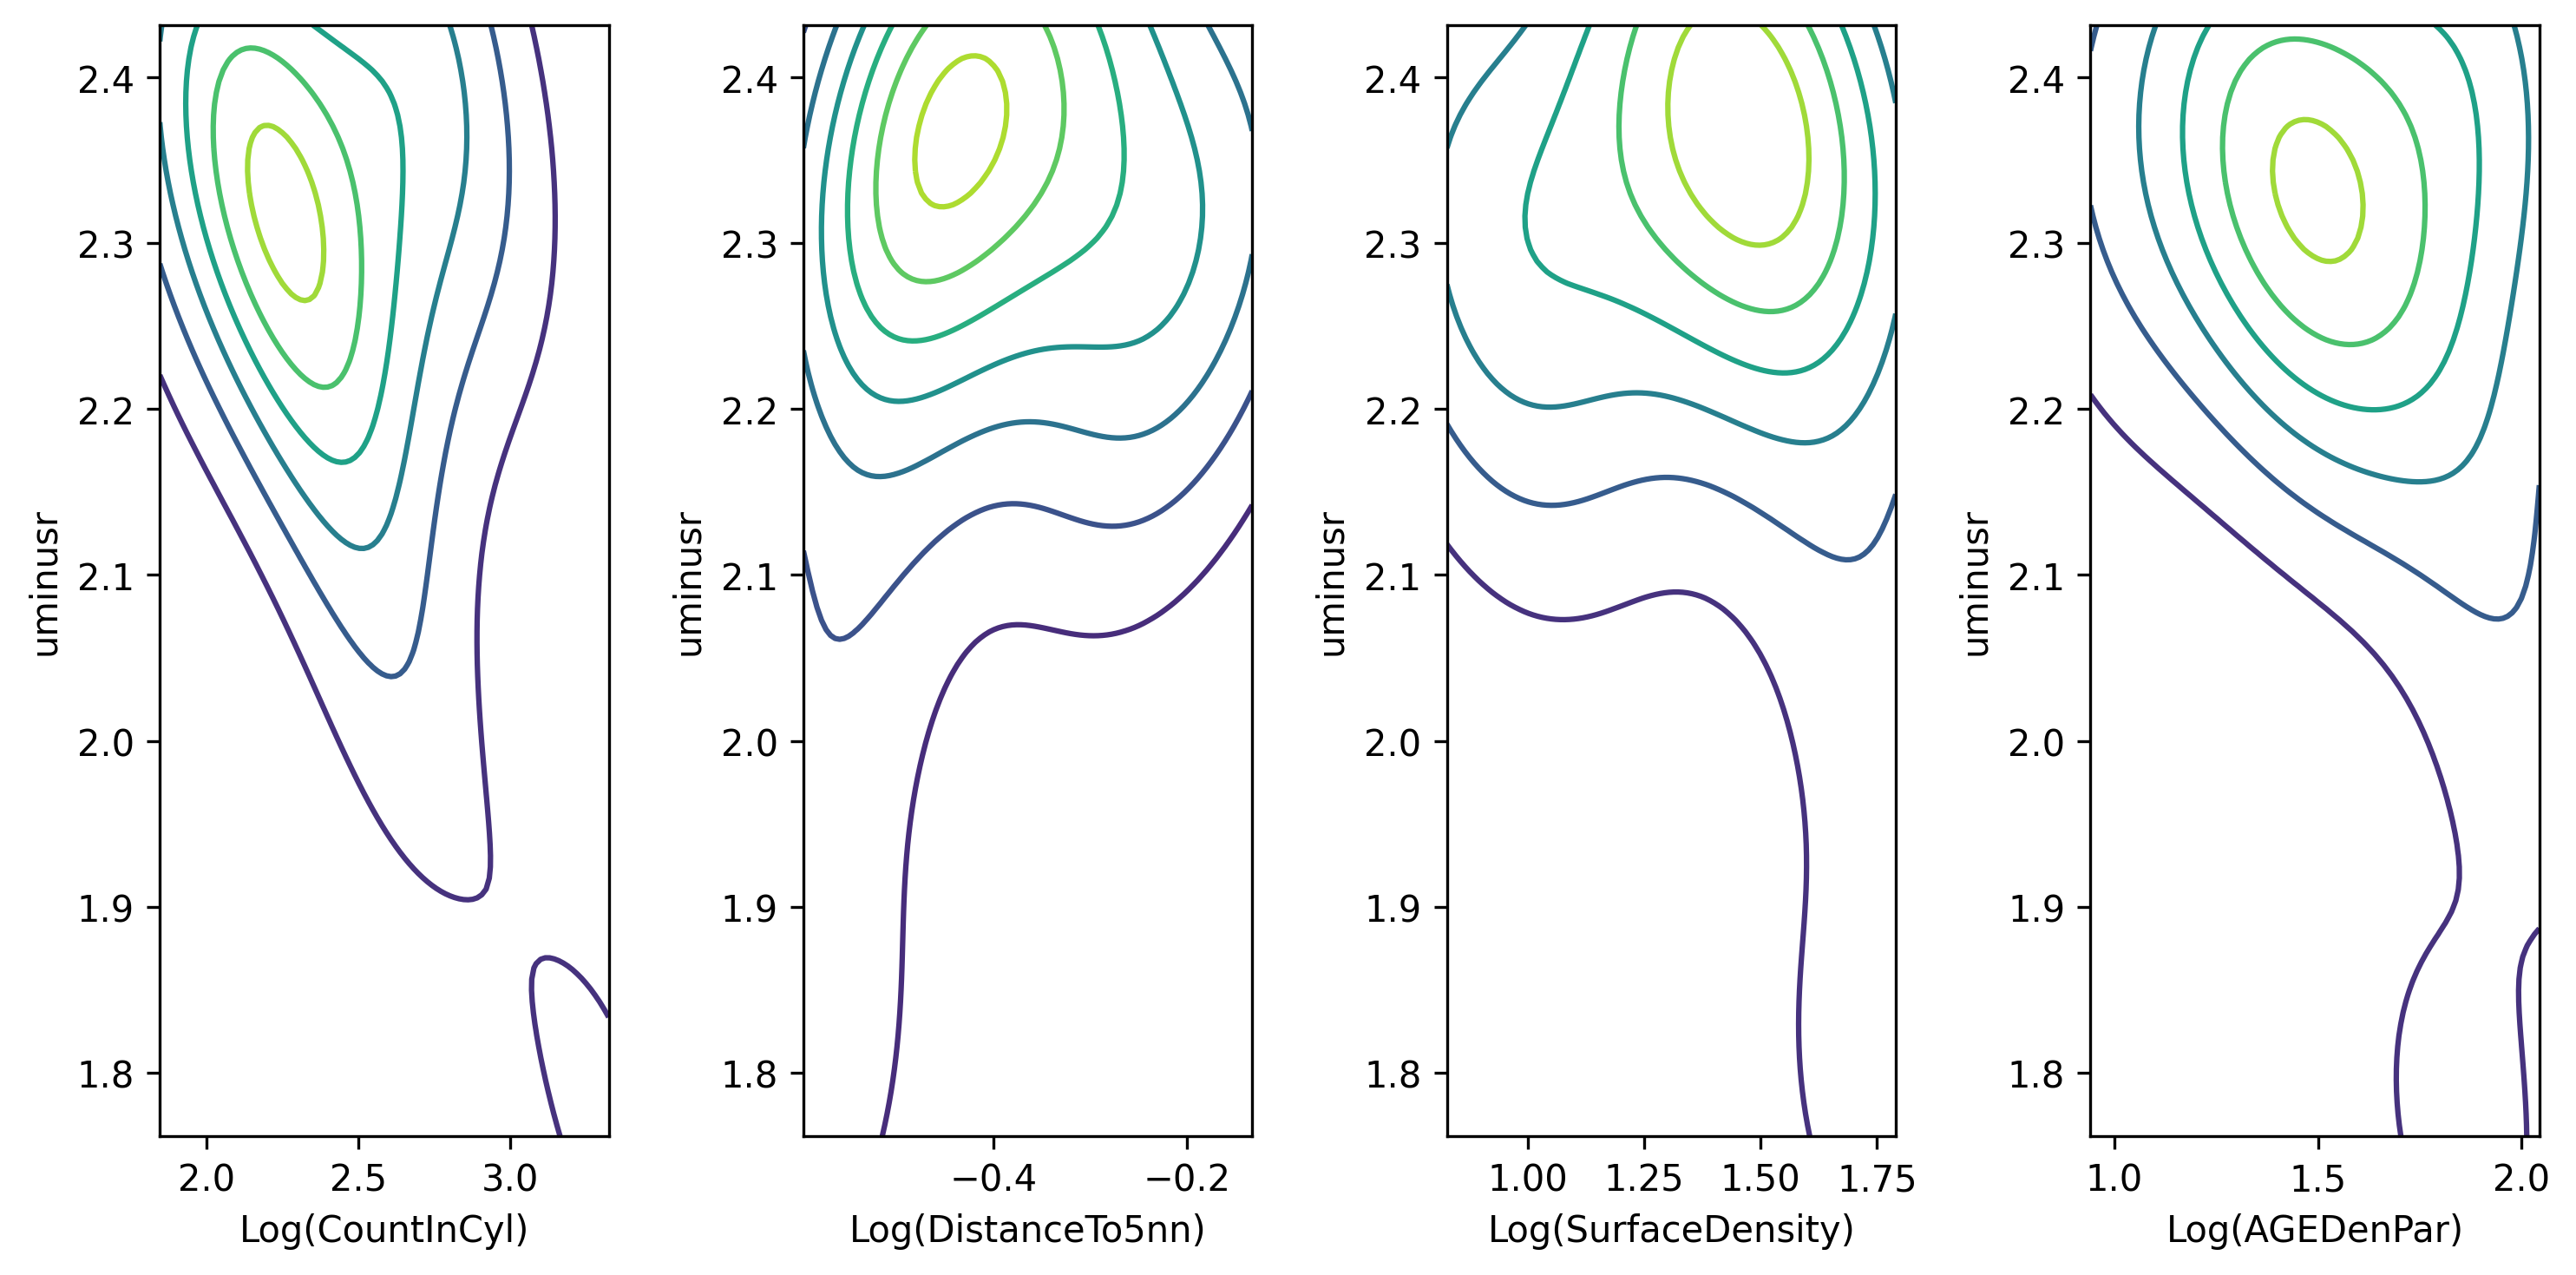

In [1]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd


ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')
print(f"ForGroup : {len(ForGroup)}")
## Clean Data

GroupGal = Table.read('../../GAMA_DATA/G3CGalv10.fits')
# Clean data
GroupGal = GroupGal[GroupGal['GroupID'] > 0 ]
sizeGroupGal = len(GroupGal)
print(f"GroupGal : {len(GroupGal)}")
#maxRank = max(GroupGal['RankBCG'])
#minRank = min(GroupGal['RankBCG'])
#cutRank = maxRank * 0.3
#print(f"Max RankBCG {maxRank}")
#print(f"Min RankBCG {minRank}")
#print(f"Cut {cutRank}")
#GroupGal = GroupGal[GroupGal['RankBCG'] > cutRank] 

maxCoSep = max(GroupGal['CoSepBCG'])
minCoSep = min(GroupGal['CoSepBCG'])
cutCoSep = maxCoSep * 0.083
print(f"Max CoSepBCG {maxCoSep}")
print(f"Min CoSepBCG {minCoSep}")
print(f"Cut {cutCoSep}")
GroupGal = GroupGal[GroupGal['CoSepBCG'] > cutCoSep] 
newSize = len(GroupGal)
print(f"GroupGal : {newSize}")
print(f"Outer percentage {100*newSize/sizeGroupGal}")


StellarMasses = Table.read('../../GAMA_DATA/StellarMassesv19.fits')
# Clean Data
#StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['metal'] > 0.001]


StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['metal'] > 0.01]
print(f"StellarMasses : {len(StellarMasses)}")


envMeasures = Table.read('../../GAMA_DATA/EnvironmentMeasuresv05.fits')
print(f"EnvMeasures : {len(envMeasures)}")
# Clean Data
envMeasures = envMeasures[envMeasures['SurfaceDensity'] < 50]
envMeasures = envMeasures[envMeasures['AGEDenParFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCylFlag'] == 0]

envClass = Table.read('../../GAMA_DATA/GalaxiesClassifiedv01.fits')
# Clean Data


visualMorph = Table.read('../../GAMA_Data/VisualMorphologyv03.fits')
print(f"visualMorph : {len(visualMorph)}")
## Clean Data
visualMorphElliptical = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 1]
visualMorphSpiral = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 10]

DataLocalGroup = join(GroupGal,StellarMasses,keys='CATAID',join_type='inner')
print(f"Join GroupGal & StellarMasses {len(DataLocalGroup)}")
print('GroupGal & StellarMasses')
print(DataLocalGroup.colnames)
print(len(DataLocalGroup))

#import math

# Sum uminsur, logmstar and metal over Local Group
#DLG_Groups = DataLocalGroup.group_by('GroupID')
#GroupData = DLG_Groups['GroupID','uminusr','logmstar','metal'].groups.aggregate(np.sum)
#GroupData = DLG_Groups['GroupID','uminusr'].groups.aggregate(lambda x: -2.5*math.log(np.sum(10**(-0.4 * x))))
#print(GroupData)


#print('GroupData')
#print(GroupData.colnames)
#print('GroupGal')
#print(GroupGal.colnames)

#FinalData = join(GroupGal,GroupData,keys='GroupID',join_type='inner')
#print(FinalData)
#print(FinalData.colnames)

#FinalData = join(DataLocalGroup,envMeasures,keys='CATAID',join_type='inner')
#print('Joining Environment Measures '+str(len(FinalData)))
#print(FinalData.colnames)

RErange = join(DataLocalGroup,visualMorphElliptical,keys='CATAID',join_type='inner')
print('Joining VisualMorphElliptical '+str(len(RErange)))
print(len(RErange))

RErange = join(RErange,envMeasures,keys='CATAID',join_type='inner')
print('Joining Environmental Measures '+str(len(RErange)))
print(len(RErange))


alphaVal = .3
binCount = 100
yfield = 'uminusr'
                                                             
fig = plt.figure(figsize=(10, 5), dpi=300)
#fig.suptitle('Density Plots - '+yfield+' versus Log Enviroment Measures for Outer Elliptical Galaxies in Locak Group')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
y = RErange[yfield]
ymin = min(y)
ymax = max(y)
print(f" yfield {yfield} ymin {ymin} ymax {ymax}\n")
for i,xfield in enumerate(xfields,1) :
    x = RErange[xfield]
    xmin = min(x)
    xmax = max(x)
    print(f" xfield {xfield} xmin {xmin} xmax {xmax}")
    x = np.log(RErange[xfield]+0.01)
    xmin = min(x)
    xmax = max(x)
    print(f" xfield {xfield} log values - xmin {xmin} xmax {xmax}")
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel(yfield)
    ax.set_xlabel('Log('+xfield+')')
    #ax.invert_yaxis()
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    
    #ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.contour(X, Y, Z)
    
    #ax.plot(x, y, 'k.', markersize=2)
    
    
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    r, p = stats.spearmanr(x,y)
    print(f"Spearman Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    r, p = stats.pearsonr(x,y)
    print(f"Pearson Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    m, c, r, p, se = stats.linregress(x,y)
    print(f"Linear Regresion x: {xfield} y: {yfield} slope : {m} Intercept {c} Correlation {r} Wald test {p} {se}")
#fig.legend(loc="upper right")
fig.tight_layout()
fig.savefig('../../ChartsPlots/Outer_Group_Density_'+yfield+'_Log_CoMoving_Environments.png', dpi=300, bbox_inches='tight')
plt.show()





